# Base classifier

In [2]:
import pandas as pd
df = pd.read_csv("/content/breast-cancer.csv")

In [ ]:
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' and the "id" column)
X = df.drop(["diagnosis","id"], axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

y_train = y_train.reset_index().drop("index", axis = 1).diagnosis.values
y_test = y_test.reset_index().drop("index", axis = 1).diagnosis.values

# y_train[y_train == "B"] = 0
# y_train[y_train == "M"] = 1

# y_test[y_test == "B"] = 0
# y_test[y_test == "M"] = 1

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Define the percentage of training data to select
percentages = np.arange(0.1, 1.0, 0.1)

f1_scores_test_f1s = []
# Iterate over each percentage
for percent in percentages:
    # Split the dataset into training and testing sets, maintaining class balance
    sss = StratifiedShuffleSplit(n_splits=1, train_size=percent, random_state=42)
    for train_index, _ in sss.split(X_train, y_train):
        X_train_sss = X_train_scaled[train_index]
        y_train_sss = y_train[train_index]

    # Fit the model
    f1_scores_test_f1 = []

    for i in range(10, 55, 10):
      nn_model = MLPClassifier(hidden_layer_sizes=[32 for i in range(2)], activation='relu', solver='adam', max_iter=1000, random_state=i)
      nn_model.fit(X_train_sss , list(y_train_sss))
      y_test_pred = nn_model.predict(X_test_scaled)
      f1_scores_test_f1.append(f1_score(np.asarray(y_test), np.asarray(y_test_pred), average='weighted'))

    f1_scores_test_f1s.append(f1_scores_test_f1)

f1_scores_test_f1 = []

for i in range(10, 55, 10):
   nn_model = MLPClassifier(hidden_layer_sizes=[32 for i in range(2)], activation='relu', solver='adam', max_iter=1000, random_state=i)
   nn_model.fit(X_train_scaled , y_train)
   y_test_pred = nn_model.predict(X_test_scaled)
   f1_scores_test_f1.append(f1_score(np.asarray(y_test), np.asarray(y_test_pred), average='weighted'))

f1_scores_test_f1s.append(f1_scores_test_f1)

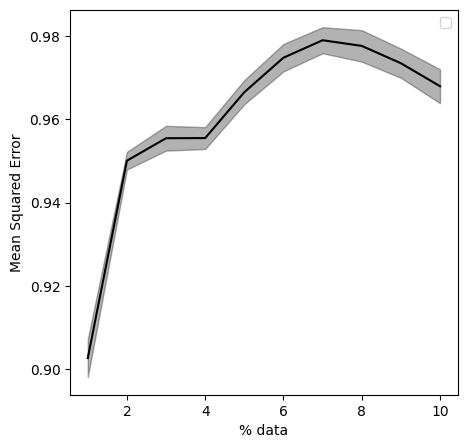

In [ ]:
import matplotlib.pyplot as plt
y_mean_train = np.mean(f1_scores_test_f1s, axis = 1)
y_std_train = np.std(f1_scores_test_f1s, axis = 1) / np.sqrt(len(f1_scores_test_f1s))

figure = plt.figure(figsize=(5, 5))
# Create upper and lower bounds for the area plot
y_upper = y_mean_train + y_std_train
y_lower = y_mean_train - y_std_train

# Plot area with mean line
plt.fill_between(range(1, len(y_upper)+1), y_lower, y_upper, color='black', alpha=0.3)
plt.plot(range(1, len(y_upper)+1), y_mean_train, color='black')

# Add labels and legend
plt.xlabel('% data')
plt.ylabel('Mean Squared Error')
plt.legend()

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'f1_scores_test_f1s.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(f1_scores_test_f1s, f)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Train the model
f1_scores_test_all = []
f1_scores_train_all = []
for seeds in range(10, 55, 10):
  # Define the neural network model
  mlp = MLPClassifier(hidden_layer_sizes=[32 for i in range(2)], activation='relu', solver='adam', max_iter=1000, random_state=seeds)
  # Initialize lists to store F1 scores
  f1_scores_train = []
  f1_scores_test = []
  for i in range(mlp.max_iter):
      mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y))

      # Predict on the training and testing sets
      y_train_pred = mlp.predict(X_train_scaled)
      y_test_pred = mlp.predict(X_test_scaled)

      # Calculate F1 score
      f1_train = f1_score(y_train, y_train_pred, pos_label = "M")
      f1_test = f1_score(y_test, y_test_pred, pos_label = "M")

      # Append F1 scores to lists
      f1_scores_train.append(f1_train)
      f1_scores_test.append(f1_test)
  f1_scores_test_all.append(f1_scores_test)
  f1_scores_train_all.append(f1_scores_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Train the model
mse_scores_test_all = []
mse_scores_train_all = []
for seeds in range(10, 55, 10):
  # Define the neural network model
  mlp = MLPClassifier(hidden_layer_sizes=[32 for i in range(2)], activation='relu', solver='adam', max_iter=1000, random_state=seeds)
  # Initialize lists to store F1 scores
  mse_scores_train = []
  mse_scores_test = []
  for i in range(mlp.max_iter):
      mlp.partial_fit(X_train_scaled, list(y_train), classes=[0, 1])

      # Predict on the training and testing sets
      y_train_pred = mlp.predict(X_train_scaled)
      y_test_pred = mlp.predict(X_test_scaled)

      # Calculate F1 score
      mse_train = mean_squared_error(y_train, y_train_pred)
      mse_test = mean_squared_error(y_test, y_test_pred)

      # Append F1 scores to lists
      mse_scores_train.append(mse_train)
      mse_scores_test.append(mse_test)
  mse_scores_test_all.append(mse_scores_test)
  mse_scores_train_all.append(mse_scores_train)

In [ ]:
np.unique(y_train)

array([0, 1], dtype=object)

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'results_nn_mlp.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump([f1_scores_test_all, f1_scores_train_all], f)

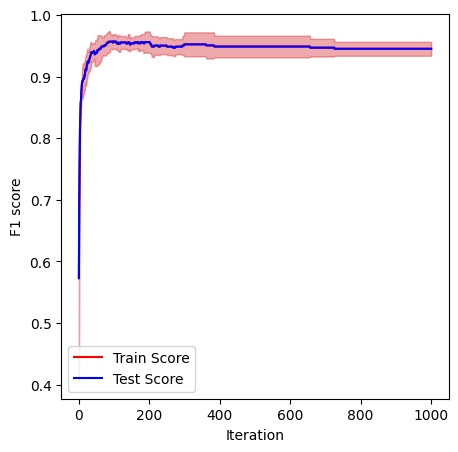

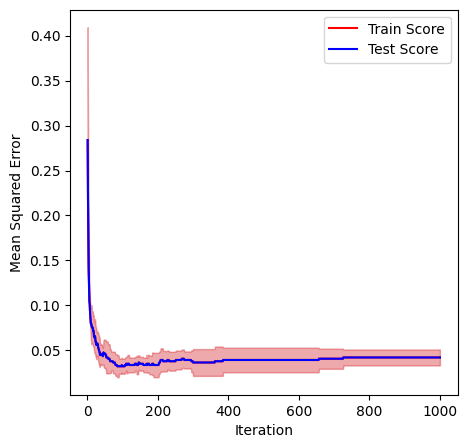

In [ ]:
def area_plot(x, y_mean_train, y_std_train, y_mean_test, y_std_test, y_label = "F1 score"):

  figure = plt.figure(figsize=(5, 5))
  # Create upper and lower bounds for the area plot
  y_upper = y_mean_train + y_std_train
  y_lower = y_mean_train - y_std_train

  # Plot area with mean line
  plt.fill_between(x, y_lower, y_upper, color='lightblue', alpha=0.3)
  plt.plot(x, y_mean_train, color='red', label='Train Score')


  # Create upper and lower bounds for the area plot
  y_upper = y_mean_test + y_std_test
  y_lower = y_mean_test - y_std_test

  # Plot area with mean line
  plt.fill_between(x, y_lower, y_upper, color='red', alpha=0.3)
  plt.plot(x, y_mean_test, color='blue', label='Test Score')

  # Add labels and legend
  plt.xlabel('Iteration')
  plt.ylabel(y_label)
  plt.legend()

  # Show plot
  plt.show()

x = range(1, mlp.max_iter + 1)
y_mean_test = np.mean(f1_scores_test_all, axis = 0)
y_std_test = np.std(f1_scores_test_all, axis = 0)

y_mean_train = np.mean(f1_scores_test_all, axis = 0)
y_std_train = np.std(f1_scores_test_all, axis = 0)
area_plot(x, y_mean_train, y_std_train, y_mean_test, y_std_test, y_label = "F1 score")

x = range(1, mlp.max_iter + 1)
y_mean_test = np.mean(mse_scores_test_all, axis = 0)
y_std_test = np.std(mse_scores_test_all, axis = 0)

y_mean_train = np.mean(mse_scores_test_all, axis = 0)
y_std_train = np.std(mse_scores_test_all, axis = 0)
area_plot(x, y_mean_train, y_std_train, y_mean_test, y_std_test, y_label = "Mean Squared Error")

# # Plot F1 scores versus training iteration
# plt.area(range(1, mlp.max_iter + 1), f1_scores_train, label='Train')
# plt.plot(range(1, mlp.max_iter + 1), f1_scores_test, label='Test')
# plt.xlabel('Training Iteration')
# plt.ylabel('F1 Score')
# plt.title('F1 Score vs Training Iteration')
# plt.legend()
# plt.grid(True)
# plt.show()

# Random optimized weight estimation

In [3]:
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' and the "id" column)
X = df.drop(["diagnosis","id"], axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

y_train = y_train.reset_index().drop("index", axis = 1).diagnosis.values
y_test = y_test.reset_index().drop("index", axis = 1).diagnosis.values


y_train[y_train == "M"] = 1
y_train[y_train == "B"] = 0

y_test[y_test == "M"] = 1
y_test[y_test == "B"] = 0

one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [ ]:
!git clone https://github.com/gkhayes/mlrose.git

Cloning into 'mlrose'...
remote: Enumerating objects: 853, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 853 (delta 0), reused 4 (delta 0), pack-reused 849
Receiving objects: 100% (853/853), 414.44 KiB | 3.84 MiB/s, done.
Resolving deltas: 100% (551/551), done.


In [5]:
!pip install --no-deps mlrose

In [6]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import math

## SA parameter optimization

In [11]:
from sklearn.metrics import f1_score
def nn_model_args(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='random_hill_climb', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5, max_attempts=1, \
                                 curve=True, mutation_prob = None, pop_size = None, random_state = 42):
    args = {"hidden_nodes": hidden_nodes,
            "activation": activation,
            "bias": bias,
            "is_classifier": is_classifier,
            "learning_rate": learning_rate,
            "early_stopping": early_stopping,
            "clip_max": clip_max,
            "max_attempts": max_attempts,
            "curve": curve,
            "algorithm": algorithm,
            "random_state": random_state}

    if algorithm == "genetic_alg" and mutation_prob == None:
      if pop_size == None:
        args["mutation_prob"] = 0.1
        args["pop_size"] = 200
      else:
        args["mutation_prob"] = 0.1
        args["pop_size"] = pop_size
    elif algorithm == "genetic_alg":
      args["mutation_prob"] = mutation_prob
      if pop_size == None:
        args["pop_size"] = 200
      else:
        args["pop_size"] = pop_size
    elif algorithm == 'simulated_annealing':
      args["schedule"] = mlrose.GeomDecay()
    return args

In [12]:
import time
def grid_search(args_list, X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, iters_range, r_range):
    results = {}

    for args in args_list:
        times = []
        train_scores = []
        test_scores = []
        for iters in iters_range:
            times_iters = []
            train_score_iters = []
            test_score_iters = []
            for r in r_range:
                args["max_iters"] = iters
                args["random_state"] = r
                nn_model = mlrose.NeuralNetwork(**args)  # Unpack the dictionary

                start = time.time()
                nn_model.fit(X_train_scaled, y_train_hot)
                end = time.time()
                times_iters.append(end - start)

                # Predict labels for train set and assess accuracy
                y_train_pred = nn_model.predict(X_train_scaled)
                y_train_f1 = f1_score(np.asarray(y_train_hot), np.asarray(y_train_pred), average='weighted')

                # Predict labels for test set and assess accuracy
                y_test_pred = nn_model.predict(X_test_scaled)
                y_test_f1 = f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted')

                train_score_iters.append(y_train_f1)
                test_score_iters.append(y_test_f1)
                print(f"Done for {args}")
            times.append(times_iters)
            train_scores.append(train_score_iters)
            test_scores.append(test_score_iters)

        avg_time = np.mean(times, axis=1)
        avg_train_scores = np.mean(train_scores, axis=1)
        avg_test_scores = np.mean(test_scores, axis=1)
        sem_time = np.std(times, axis=1) / np.sqrt(len(r_range))
        sem_train_scores = np.std(train_scores, axis=1) / np.sqrt(len(r_range))
        sem_test_scores = np.std(test_scores, axis=1) / np.sqrt(len(r_range))
        if args['algorithm'] == "genetic_alg":
          results[f"{args['algorithm']}, {args['mutation_prob']}, {args['pop_size']}"] = {"time": avg_time, "sem_time": sem_time,
                                        "train_scores": avg_train_scores, "sem_train_scores": sem_train_scores,
                                        "test_scores": avg_test_scores, "sem_test_scores": sem_test_scores,
                                                                                          'times': times, "train_scores_a": train_scores, 'test_scores_a': test_scores}
        else:
          results[f"{args['algorithm']}, {args['learning_rate']}"] = {"time": avg_time, "sem_time": sem_time,
                                        "train_scores": avg_train_scores, "sem_train_scores": sem_train_scores,
                                        "test_scores": avg_test_scores, "sem_test_scores": sem_test_scores,
                                        'times': times, "train_scores_a": train_scores, 'test_scores_a': test_scores}

    return results

In [13]:
def plot_error_grid(results):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (optimizer, data) in enumerate(results.items()):
        # Plot Time vs Iterations with SEM
        axes[0].fill_between(iters_range, data["time"] - data["sem_time"], data["time"] + data["sem_time"], alpha=0.2)
        axes[0].plot(iters_range, data["time"], label=f'{optimizer} - Time', linestyle='-', marker='o')

        # Plot Train Scores vs Iterations with SEM
        axes[1].fill_between(iters_range, data["train_scores"] - data["sem_train_scores"], data["train_scores"] + data["sem_train_scores"], alpha=0.2)
        axes[1].plot(iters_range, data["train_scores"], label=f'{optimizer} - Train Scores', linestyle='-', marker='o')

        # Plot Test Scores vs Iterations with SEM
        axes[2].fill_between(iters_range, data["test_scores"] - data["sem_test_scores"], data["test_scores"] + data["sem_test_scores"], alpha=0.2)

        # Plot Test Scores vs Iterations with SEM
        axes[2].plot(iters_range, data["test_scores"], label=f'{optimizer} - Test Scores', linestyle='-', marker='o')

    axes[0].set_title('Time vs Iterations')
    axes[0].set_xlabel('Iterations')
    axes[0].set_ylabel('Time')
    axes[0].legend()

    axes[1].set_title('Train Scores vs Iterations')
    axes[1].set_xlabel('Iterations')
    axes[1].set_ylabel('Train Scores')
    axes[1].legend()

    axes[2].set_title('Test Scores vs Iterations')
    axes[2].set_xlabel('Iterations')
    axes[2].set_ylabel('Test Scores')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_parameter_search(results, x_label = "Population Size", colors = plt.cm.Reds(np.linspace(0.2, 1, 5))):
  fig, ax = plt.subplots(1,3, figsize=(15, 5))
  for j, y, e, name in zip([0, 1, 2], ['time', 'train_scores', 'test_scores'], ['sem_time', 'sem_train_scores', 'sem_test_scores'], ['Time (sec)','Train score F1','Tests score F1']):
    # Extracting data for plotting
    labels = [i.split(", ")[-1] for i in results.keys()]
    times = [results[i][y][0] for i in results]
    errors = [results[i][e][0] for i in results]
    # Create the bar plot
    ax[j].bar(labels, times, yerr=errors, capsize=5, color=colors)
    # Add labels in the middle of bars vertically aligned
    for i, time in enumerate(times):
        ax[j].text(i, time / 2, str(np.round(time, 2)), ha='center', va='center')

    # Add labels to x-axis and y-axis
    ax[j].set_xlabel(x_label)
    ax[j].set_ylabel(name)
    if j != 0:
      ax[j].set_ylim([0, 1])

Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'simulated_annealing', 'random_state': 10, 'schedule': <mlrose.decay.GeomDecay object at 0x7b64e98150f0>, 'max_iters': 1000}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'simulated_annealing', 'random_state': 20, 'schedule': <mlrose.decay.GeomDecay object at 0x7b64e98150f0>, 'max_iters': 1000}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'simulated_annealing', 'random_state': 30, 'schedule': <mlrose.decay.GeomDecay object at 0x7b64e98150f0>, 'max_iters': 1000}
Done for {'hi

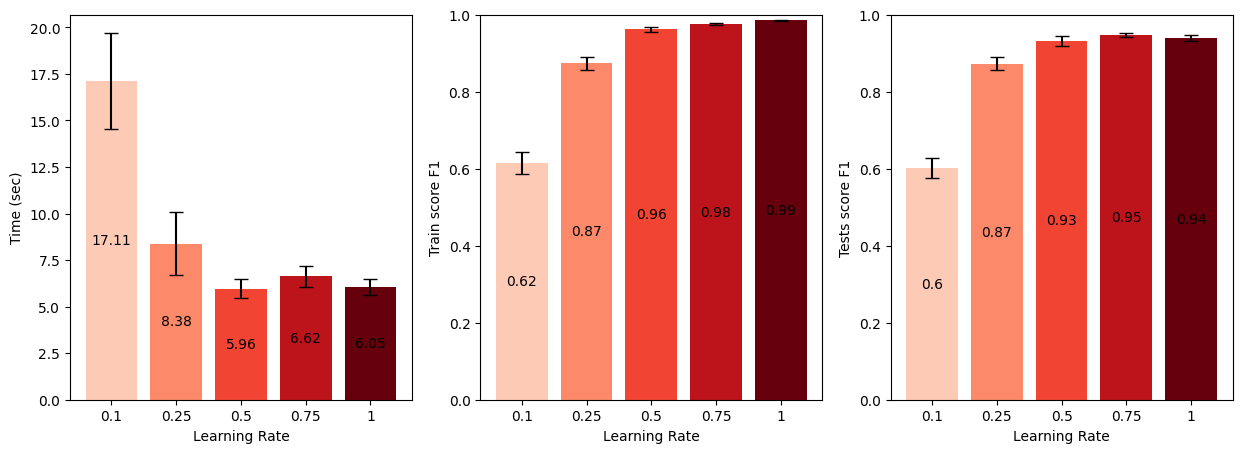

In [13]:
iters_range = [1000]
r_range = [10, 20, 30]
args_list = []
# Define the arguments for each optimizer
for lr in [0.1, 0.25, 0.5, 0.75, 1]:
  args_list += [
      # nn_model_args(algorithm='random_hill_climb', learning_rate=lr),
      # nn_model_args(algorithm='genetic_alg'),
      nn_model_args(algorithm='simulated_annealing', learning_rate=lr)
  ]

# Perform grid search
results_sa_lr = grid_search(args_list, X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, iters_range = iters_range, r_range = r_range)

# Plot results
plot_parameter_search(results = results_sa_lr, x_label = "Learning Rate")

In [ ]:
results_sa_lr

{'simulated_annealing, 0.1': {'time': array([7.2297318]),
  'sem_time': array([0.45933217]),
  'train_scores': array([0.61560624]),
  'sem_train_scores': array([0.02835758]),
  'test_scores': array([0.60204224]),
  'sem_test_scores': array([0.02528654])},
 'simulated_annealing, 0.25': {'time': array([7.79118307]),
  'sem_time': array([0.87168083]),
  'train_scores': array([0.87406856]),
  'sem_train_scores': array([0.01718748]),
  'test_scores': array([0.87258769]),
  'sem_test_scores': array([0.01642053])},
 'simulated_annealing, 0.5': {'time': array([6.97262836]),
  'sem_time': array([1.22771245]),
  'train_scores': array([0.96165803]),
  'sem_train_scores': array([0.00608312]),
  'test_scores': array([0.93274349]),
  'sem_test_scores': array([0.01328575])},
 'simulated_annealing, 0.75': {'time': array([9.75362277]),
  'sem_time': array([2.46490684]),
  'train_scores': array([0.97648033]),
  'sem_train_scores': array([0.00218702]),
  'test_scores': array([0.94655352]),
  'sem_test_sc

## RHC Parameter optimization

In [15]:
iters_range = [1000]
r_range = [10, 20, 30]
args_list = []
# Define the arguments for each optimizer
for lr in [0.1, 0.25, 0.5, 0.75, 1]:
  args_list += [
      nn_model_args(algorithm='random_hill_climb', learning_rate=lr),
      # nn_model_args(algorithm='genetic_alg'),
      # nn_model_args(algorithm='simulated_annealing', learning_rate=lr)
  ]

# Perform grid search
results_rhc_lr = grid_search(args_list, X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, iters_range = iters_range, r_range = r_range)

Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'random_hill_climb', 'random_state': 10, 'max_iters': 1000}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'random_hill_climb', 'random_state': 20, 'max_iters': 1000}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.1, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'random_hill_climb', 'random_state': 30, 'max_iters': 1000}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.25, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'ra

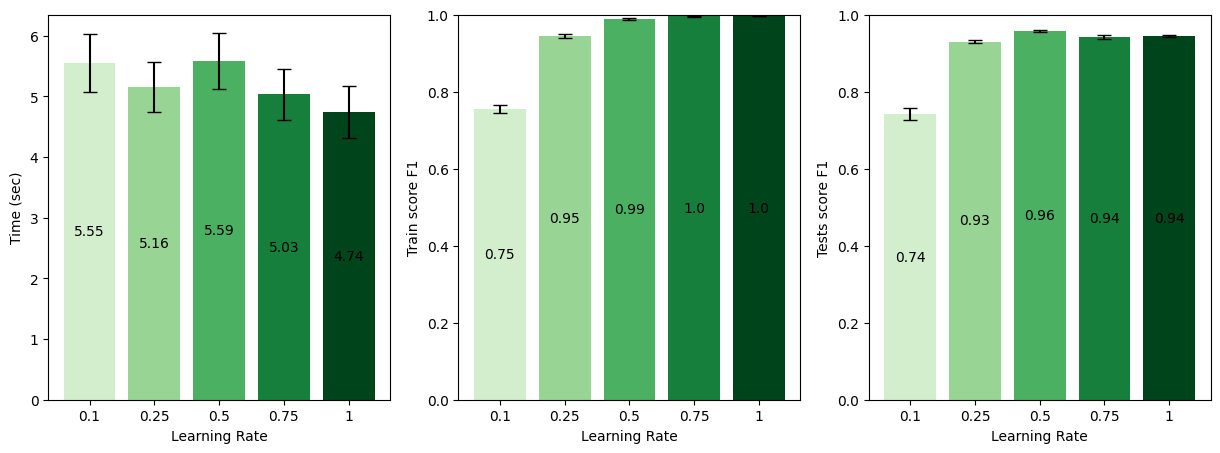

In [16]:
# Plot results
plot_parameter_search(results_rhc_lr, x_label = "Learning Rate", colors = plt.cm.Greens(np.linspace(0.2, 1, len(results_rhc_lr))))

## GA parameter optimization

In [ ]:
iters_range = [1000]
r_range = [10, 20, 30]
args_list = []
# Define the arguments for each optimizer
for mutation_prob in [0.1, 0.25, 0.5, 0.75, 1]:
  args_list += [
      # nn_model_args(algorithm='random_hill_climb', learning_rate=lr),
      nn_model_args(algorithm='genetic_alg', mutation_prob=mutation_prob, ),
      # nn_model_args(algorithm='simulated_annealing')
  ]

# Perform grid search
results_ga_m = grid_search(args_list, X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, iters_range = iters_range, r_range = r_range)

# Plot error grid
plot_parameter_search(results_ga_m, x_label = "Population Size", colors = plt.cm.Blues(np.linspace(0.2, 1, len(results_ga_m))))

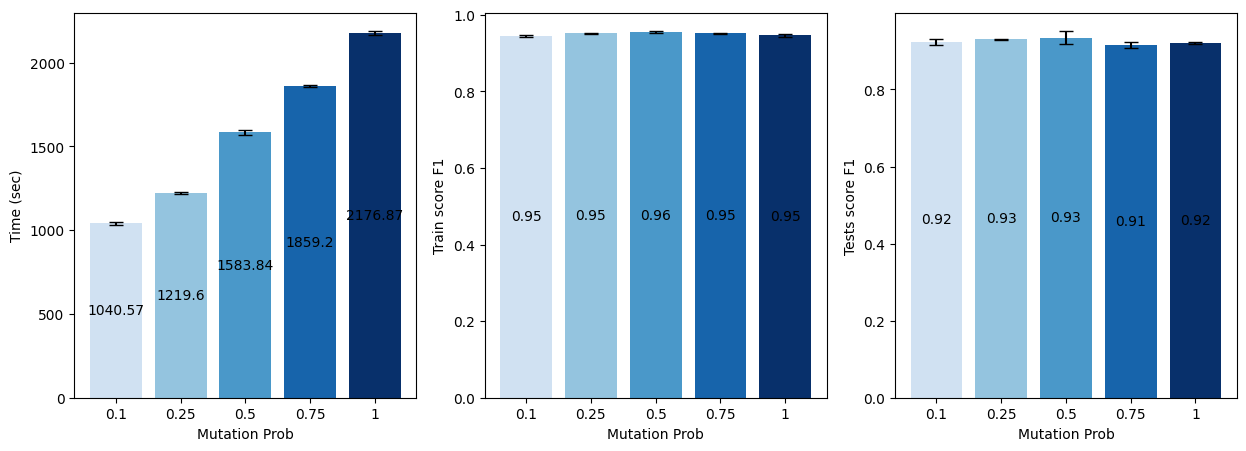

In [ ]:
def plot_parameter_ga(results, x_label = "Population Size", colors = plt.cm.Reds(np.linspace(0.2, 1, 5))):
  fig, ax = plt.subplots(1,3, figsize=(15, 5))
  for j, y, e, name in zip([0, 1, 2], ['time', 'train_scores', 'test_scores'], ['sem_time', 'sem_train_scores', 'sem_test_scores'], ['Time (sec)','Train score F1','Tests score F1']):
    # Extracting data for plotting
    labels = [i.split(", ")[-2] for i in results.keys()]
    times = [results[i][y][0] for i in results]
    errors = [results[i][e][0] for i in results]

    # Create the bar plot
    ax[j].bar(labels, times, yerr=errors, capsize=5, color=colors)

    # Add labels in the middle of bars vertically aligned
    for i, time in enumerate(times):
        ax[j].text(i, time / 2, str(np.round(time, 2)), ha='center', va='center')

    # Add labels to x-axis and y-axis
    ax[j].set_xlabel(x_label)
    ax[j].set_ylabel(name)

# Plot error grid
plot_parameter_ga(results_ga_m, x_label = "Mutation Prob", colors = plt.cm.Blues(np.linspace(0.2, 1, len(results_ga_m))))

In [ ]:
def plot_parameter_ga(results, x_label = "Population Size", colors = plt.cm.Reds(np.linspace(0.2, 1, 5))):
  fig, ax = plt.subplots(1,3, figsize=(15, 5))
  for j, y, e, name in zip([0, 1, 2], ['time', 'train_scores', 'test_scores'], ['sem_time', 'sem_train_scores', 'sem_test_scores'], ['Time (sec)','Train score F1','Tests score F1']):
    # Extracting data for plotting
    labels = [[i.split(", ")[-2] for i in results.keys()][i] for i in [2, 1, 3, 0]]
    times = [[results[i][y] for i in results][i] for i in [2, 1, 3, 0]]
    errors = [[results[i][e] for i in results][i] for i in [2, 1, 3, 0]]

    # Create the bar plot
    ax[j].bar(labels, times, yerr=errors, capsize=5, color=colors)

    # Add labels in the middle of bars vertically aligned
    for i, time in enumerate(times):
        ax[j].text(i, time / 2, str(np.round(time, 2)), ha='center', va='center')

    # Add labels to x-axis and y-axis
    ax[j].set_xlabel(x_label)
    ax[j].set_ylabel(name)
    if j != 0:
      ax[j].set_ylim([0, 1])

In [ ]:
iters_range = [1000]
r_range = [10]
args_list = []
# Define the arguments for each optimizer
for lr in [i for i in range(50, 201, 50)]:
  args_list += [
      # nn_model_args(algorithm='random_hill_climb'),
      nn_model_args(algorithm='genetic_alg', pop_size=lr, mutation_prob = 0.1),
      # nn_model_args(algorithm='simulated_annealing')
  ]

# Perform grid search
results_ga_pop = grid_search(args_list, X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, iters_range = iters_range, r_range = r_range)

Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.75, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'genetic_alg', 'mutation_prob': 0.1, 'pop_size': 50, 'max_iters': 1000, 'random_state': 10}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.75, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'genetic_alg', 'mutation_prob': 0.1, 'pop_size': 100, 'max_iters': 1000, 'random_state': 10}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_rate': 0.75, 'early_stopping': False, 'clip_max': 5, 'max_attempts': 1, 'curve': True, 'algorithm': 'genetic_alg', 'mutation_prob': 0.1, 'pop_size': 150, 'max_iters': 1000, 'random_state': 10}
Done for {'hidden_nodes': [32, 32], 'activation': 'relu', 'bias': True, 'is_classifier': True, 'learning_ra

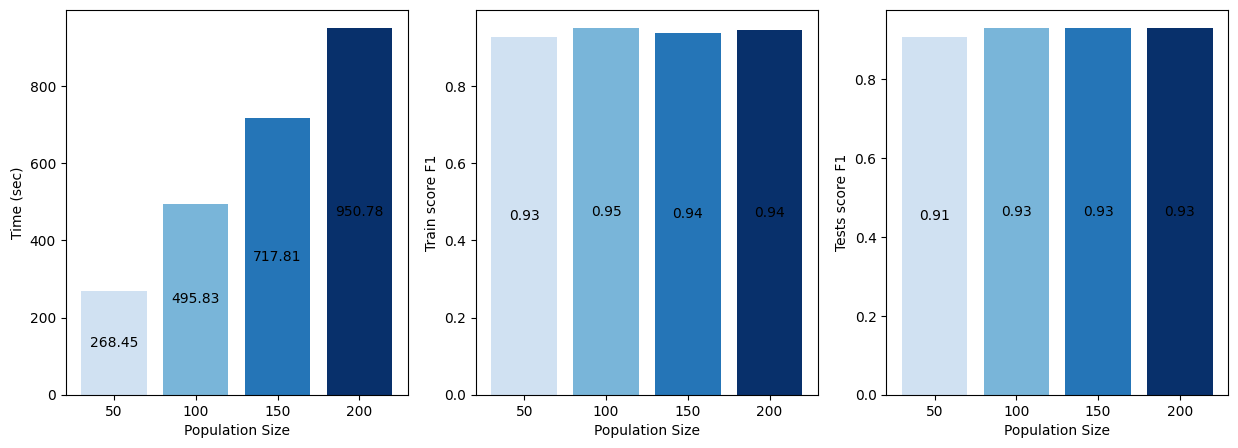

In [ ]:
# Plot error grid
plot_parameter_search(results_ga_pop, x_label = "Population Size", colors = plt.cm.Blues(np.linspace(0.2, 1, len(results_ga_pop))))

# MSE vs Iterations

### RHC

In [ ]:
fitness_ra = []
for i in range(10, 55, 10):
  nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='random_hill_climb', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i)
  nn_model.fit(X_train_scaled, y_train_hot)
  fitness_ra.append(nn_model.fitness_curve)

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'fitness_ra.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_ra, f)

### SA

In [ ]:
fitness_sa = []
for i in range(10, 55, 10):
  nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='simulated_annealing', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i, schedule = mlrose.GeomDecay())

  nn_model.fit(X_train_scaled, y_train_hot)
  fitness_sa.append(nn_model.fitness_curve)


In [ ]:
import pickle

# File path to save the pickle file
file_path = 'fitness_sa.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_sa, f)

### GA

In [ ]:
fitness_ga = []
for i in range(10, 55, 10):
  nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='genetic_alg', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i, mutation_prob = 0.1, pop_size = 100)

  nn_model.fit(X_train_scaled, y_train_hot)
  fitness_ga.append(nn_model.fitness_curve)

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'fitness_ga.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_ga, f)

# File path to save the pickle file
file_path = 'fitness_sa.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_sa, f)

# File path to save the pickle file
file_path = 'fitness_ra.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_ra, f)

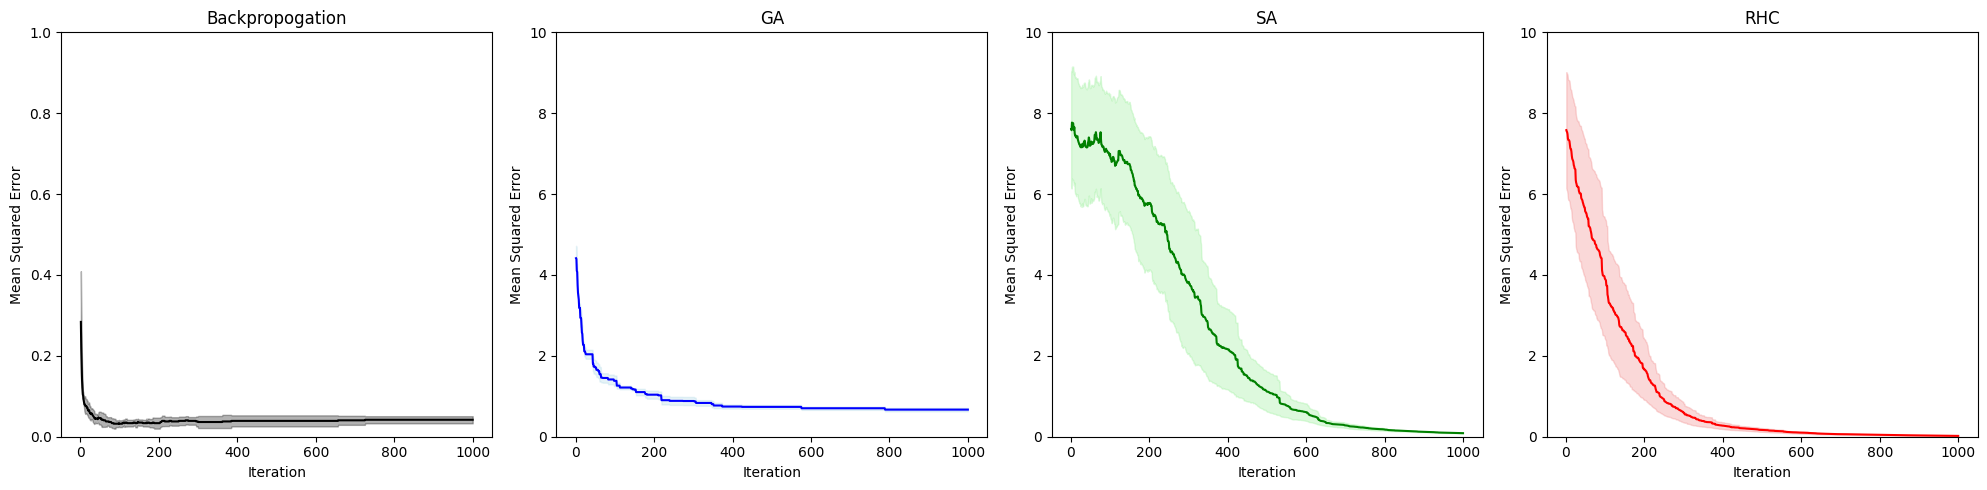

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming fitnexx_ra, fitness_ga, fitness_sa are defined elsewhere
y_mean_test = np.mean(mse_scores_test_all, axis = 0)[0:1000]
y_std_test = np.std(mse_scores_test_all, axis = 0)[0:1000]

# Calculate mean and standard deviation for fitness_ga
y_mean_ga = -np.mean(fitness_ga, axis=0)[0:1000]
y_std_ga = np.std(fitness_ga, axis=0)[0:1000] / np.sqrt(len(fitness_ga))

# Calculate mean and standard deviation for fitness_sa
y_mean_sa = -np.mean(fitness_sa, axis=0)[0:1000]
y_std_sa = np.std(fitness_sa, axis=0)[0:1000] / np.sqrt(len(fitness_sa))

# Plotting
plt.figure(figsize=(20, 5))

# Plotting fitness_ga
plt.subplot(1, 4, 1)
plt.fill_between(range(1, len(y_mean_test) + 1), y_mean_test - y_std_test, y_mean_test + y_std_test, color='black', alpha=0.3)
plt.plot(range(1, len(y_mean_test) + 1), y_mean_test, color='black')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 1])
plt.title('Backpropogation')

# Plotting fitness_ga
plt.subplot(1, 4, 2)
plt.fill_between(range(1, len(y_mean_ga) + 1), y_mean_ga - y_std_ga, y_mean_ga + y_std_ga, color='lightblue', alpha=0.3)
plt.plot(range(1, len(y_mean_ga) + 1), y_mean_ga, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 25])
plt.title('GA')

# Plotting fitness_sa
plt.subplot(1, 4, 3)
plt.fill_between(range(1, len(y_mean_sa) + 1), y_mean_sa - y_std_sa, y_mean_sa + y_std_sa, color='red', alpha=0.3)
plt.plot(range(1, len(y_mean_sa) + 1), y_mean_sa, color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 10])
plt.title('SA')

# Plotting fitnexx_ra
plt.subplot(1, 4, 4)
# Assuming fitnexx_ra is available, and its format is similar to fitness_ga and fitness_sa
y_mean_ra = -np.mean(fitness_ra, axis=0)[0:1000]
y_std_ra = np.std(fitness_ra, axis=0)[0:1000] / np.sqrt(len(fitness_ra))
plt.fill_between(range(1, len(y_mean_ra) + 1), y_mean_ra - y_std_ra, y_mean_ra + y_std_ra, color='green', alpha=0.3)
plt.plot(range(1, len(y_mean_ra) + 1), y_mean_ra, color='green')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 10])
plt.title('RHC')

plt.tight_layout()
plt.show()

# Plots vs size

## SA and RHC

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Define the percentage of training data to select
percentages = np.arange(0.1, 1.0, 0.1)

fitness_sa_f1s = []
fitness_ra_f1s = []
# Iterate over each percentage
for percent in percentages:
    # Split the dataset into training and testing sets, maintaining class balance
    sss = StratifiedShuffleSplit(n_splits=1, train_size=percent, random_state=42)
    for train_index, _ in sss.split(X_train, y_train):
        X_train_sss = X_train_scaled[train_index]
        y_train_sss = y_train_hot[train_index]

    # Fit the model
    fitness_sa_f1 = []
    fitness_ra_f1 = []

    for i in range(10, 55, 10):
      nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='simulated_annealing', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i, schedule = mlrose.GeomDecay())

      nn_model.fit(X_train_sss , y_train_sss)
      y_test_pred = nn_model.predict(X_test_scaled)
      fitness_sa_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

      nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='random_hill_climb', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i)

      nn_model.fit(X_train_sss , y_train_sss)
      y_test_pred = nn_model.predict(X_test_scaled)
      fitness_ra_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

    fitness_sa_f1s.append(fitness_sa_f1)
    fitness_ra_f1s.append(fitness_ra_f1)

fitness_sa_f1 = []
fitness_ra_f1 = []

for i in range(10, 55, 10):
      nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                    algorithm='simulated_annealing', max_iters=1000, \
                                    bias=True, is_classifier=True, learning_rate=0.75, \
                                    early_stopping=False, clip_max=5,\
                                    curve=True, random_state = i, schedule = mlrose.GeomDecay())

      nn_model.fit(X_train_sss , y_train_sss)
      y_test_pred = nn_model.predict(X_test_scaled)
      fitness_sa_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

      nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='random_hill_climb', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i)
      nn_model.fit(X_train_scaled , y_train_hot)
      y_test_pred = nn_model.predict(X_test_scaled)
      fitness_ra_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

fitness_sa_f1s.append(fitness_sa_f1)
fitness_ra_f1s.append(fitness_ra_f1)

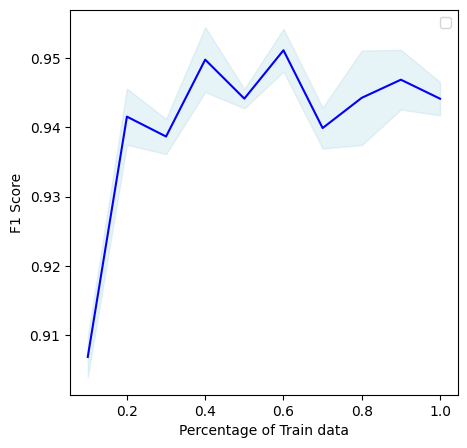

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'fitness_sa_f1s_data_size.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_sa_f1s, f)



In [ ]:

y_mean_train = np.mean(fitness_ra_f1s, axis = 1)
y_std_train = np.std(fitness_ra_f1s, axis = 1) / np.sqrt(len(fitness_sa_f1s))

figure = plt.figure(figsize=(5, 5))
# Create upper and lower bounds for the area plot
y_upper = y_mean_train + y_std_train
y_lower = y_mean_train - y_std_train

# Plot area with mean line
plt.fill_between(np.arange(0.1, 1.1, 0.1), y_lower, y_upper, color='lightblue', alpha=0.3)
plt.plot(np.arange(0.1, 1.1, 0.1), y_mean_train, color='blue')

# Add labels and legend
plt.xlabel('Percentage of Train data')
plt.ylabel('F1 Score')
plt.legend()

## GA

In [ ]:
# Define the percentage of training data to select
percentages = np.arange(0.1, 1.0, 0.1)

fitness_ga_f1s = []
# Iterate over each percentage
for percent in percentages:
    # Split the dataset into training and testing sets, maintaining class balance
    sss = StratifiedShuffleSplit(n_splits=1, train_size=percent, random_state=42)
    for train_index, _ in sss.split(X_train, y_train):
        X_train_sss = X_train_scaled[train_index]
        y_train_sss = y_train_hot[train_index]

    # Fit the model
    fitness_ga_f1 = []

    for i in range(10, 55, 10):
      nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='genetic_alg', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i, mutation_prob = 0.1, pop_size = 100)

      nn_model.fit(X_train_sss , y_train_sss)
      y_test_pred = nn_model.predict(X_test_scaled)
      fitness_ga_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

    fitness_ga_f1s.append(fitness_ga_f1)

fitness_ga_f1 = []

for i in range(10, 55, 10):
   nn_model = mlrose.NeuralNetwork(hidden_nodes=[32 for i in range(2)], activation='relu', \
                                 algorithm='genetic_alg', max_iters=1000, \
                                 bias=True, is_classifier=True, learning_rate=0.75, \
                                 early_stopping=False, clip_max=5,\
                                 curve=True, random_state = i, mutation_prob = 0.1, pop_size = 100)

   nn_model.fit(X_train_scaled , y_train_hot)
   y_test_pred = nn_model.predict(X_test_scaled)
   fitness_ga_f1.append(f1_score(np.asarray(y_test_hot), np.asarray(y_test_pred), average='weighted'))

fitness_ga_f1s.append(fitness_ga_f1)

In [ ]:
import pickle

# File path to save the pickle file
file_path = 'fitness_ga_f1s_data_size.pickle'

# Save the variable to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_ga_f1s, f)

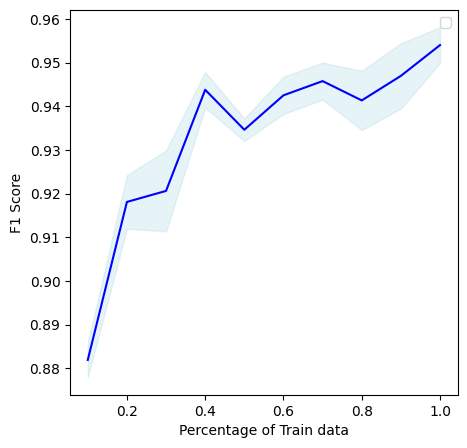

In [ ]:
y_mean_train = np.mean(fitness_ga_f1s, axis = 1)
y_std_train = np.std(fitness_ga_f1s, axis = 1) / np.sqrt(len(fitness_ga_f1s))

figure = plt.figure(figsize=(5, 5))
# Create upper and lower bounds for the area plot
y_upper = y_mean_train + y_std_train
y_lower = y_mean_train - y_std_train

# Plot area with mean line
plt.fill_between(np.arange(0.1, 1.1, 0.1), y_lower, y_upper, color='lightblue', alpha=0.3)
plt.plot(np.arange(0.1, 1.1, 0.1), y_mean_train, color='blue')

# Add labels and legend
plt.xlabel('Percentage of Train data')
plt.ylabel('F1 Score')
plt.legend()

In [ ]:
from google.colab import drive
import pickle

# Mount Google Drive
drive.mount('/content/drive')

# File path in your Google Drive
file_path = '/content/drive/My Drive/fitness_ga_f1s_data_size.pickle'

# Saving data to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(fitness_ga_f1s, f)

Mounted at /content/drive


In [18]:

file_path = '/content/fitness_sa_f1s_data_size.pickle'

# Saving data to a pickle file
with open(file_path, 'rb') as f:
    fitness_sa_f1s = pickle.load(f)


file_path = '/content/fitness_ra_f1s_data_size.pickle'

# Saving data to a pickle file
with open(file_path, 'rb') as f:
    fitness_ra_f1s = pickle.load(f)

In [9]:
import pickle
file_path = '/content/fitness_ga_f1s_data_size.pickle'

# Saving data to a pickle file
with open(file_path, 'rb') as f:
    fitness_ga_f1s = pickle.load(f)

file_path = '/content/f1_scores_test_f1s.pickle'

# Saving data to a pickle file
with open(file_path, 'rb') as f:
    f1_scores_test_all = pickle.load(f)



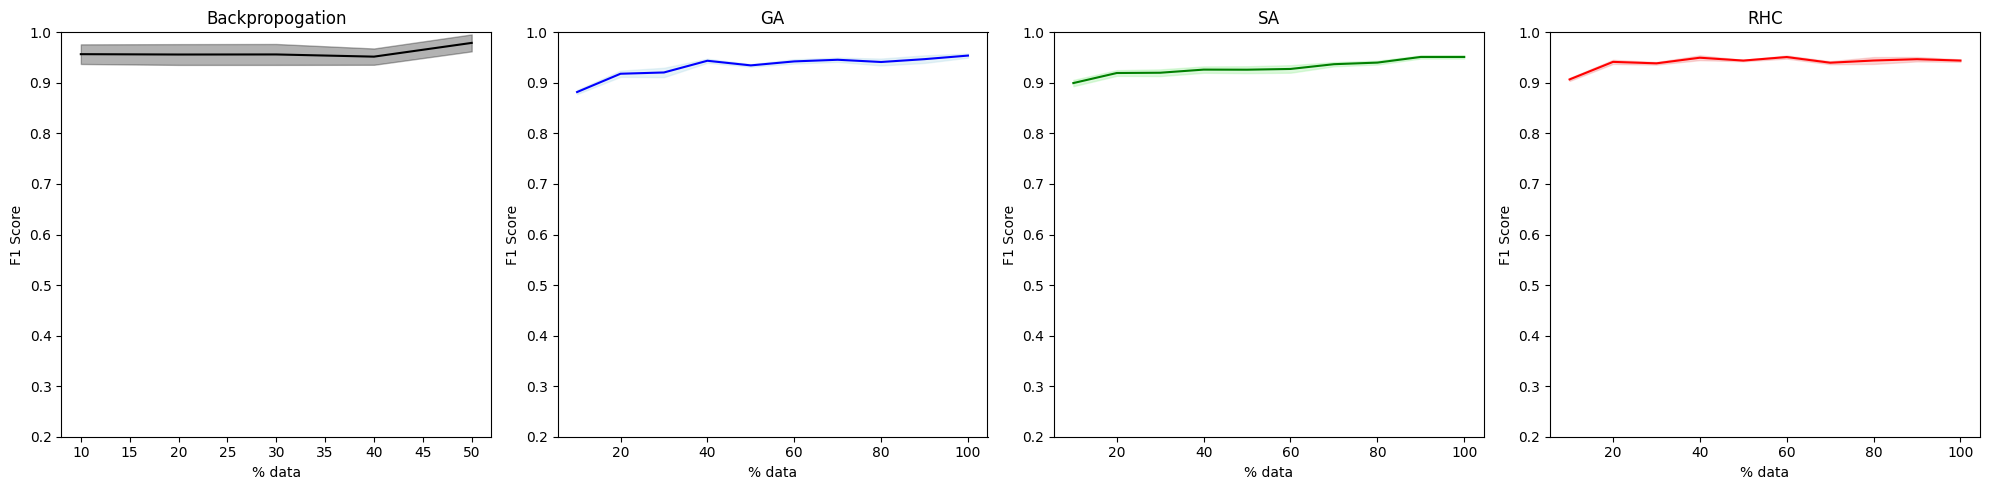

In [10]:
import numpy as np
import matplotlib.pyplot as plt

y_mean_test = np.mean(f1_scores_test_all, axis = 0)
y_std_test = np.std(f1_scores_test_all, axis = 0)


# Assuming fitnexx_ra, fitness_ga, fitness_sa are defined elsewhere

# Calculate mean and standard deviation for fitness_ga
y_mean_ga = np.mean(fitness_ga_f1s, axis = 1)
y_std_ga = np.std(fitness_ga_f1s, axis = 1) / np.sqrt(len(fitness_ga_f1s))

# Calculate mean and standard deviation for fitness_sa
y_mean_sa = np.mean(fitness_sa_f1s, axis = 1)
y_std_sa = np.std(fitness_sa_f1s, axis = 1) / np.sqrt(len(fitness_sa_f1s))

# Plotting
plt.figure(figsize=(20, 5))

# Plotting fitness_ga
plt.subplot(1, 4, 1)
plt.fill_between(range(10, 10*(len(y_mean_test) + 1), 10), y_mean_test - y_std_test, y_mean_test + y_std_test, color='black', alpha=0.3)
plt.plot(range(10, 10*(len(y_mean_test) + 1), 10), y_mean_test, color='black')
plt.xlabel('% data')
plt.ylabel('F1 Score')
plt.ylim([0.2, 1])
plt.title('Backpropogation')

# Plotting fitness_ga
plt.subplot(1, 4, 2)
plt.fill_between(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_ga - y_std_ga, y_mean_ga + y_std_ga, color='lightblue', alpha=0.3)
plt.plot(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_ga, color='blue')
plt.xlabel('% data')
plt.ylabel('F1 Score')
plt.ylim([0.2, 1])
plt.title('GA')

# Plotting fitness_sa
plt.subplot(1, 4, 3)
plt.fill_between(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_sa - y_std_sa, y_mean_sa + y_std_sa, color='lightgreen', alpha=0.3)
plt.plot(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_sa, color='green')
plt.xlabel('% data')
plt.ylabel('F1 Score')
plt.ylim([0.2, 1])
plt.title('SA')

# Plotting fitnexx_ra
plt.subplot(1, 4, 4)
# Assuming fitnexx_ra is available, and its format is similar to fitness_ga and fitness_sa
y_mean_ra = np.mean(fitness_ra_f1s, axis = 1)
y_std_ra = np.std(fitness_ra_f1s, axis = 1) / np.sqrt(len(fitness_ra_f1s))
plt.fill_between(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_ra - y_std_ra, y_mean_ra + y_std_ra, color='lightcoral', alpha=0.3)
plt.plot(range(10, 10*(len(y_mean_ga) + 1), 10), y_mean_ra, color='red')
plt.xlabel('% data')
plt.ylabel('F1 Score')
plt.ylim([0.2, 1])
plt.title('RHC')

plt.tight_layout()
plt.show()